In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [3]:
from datasets import load_dataset

# load HF dataset
ds = load_dataset("hongerzh/nft_prediction_1_with_dates")

# convert to pandas
df = ds["train"].to_pandas()

df.head()


,image,text,label,time
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"An image characterized by the title: ""Lady of ...",0.0,267.0
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"An image characterized by the title: ""KELT-9b ...",0.0,267.0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"An image characterized by the title: ""BREATHIN...",0.0,267.0
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"An image characterized by the title: ""NO-LINE ...",0.0,267.0
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"An image characterized by the title: ""Lava "", ...",0.0,267.0


### `Question 2:`

You are provided with a dataset containing information about car prices and miles driven across different years. The dataset can be accessed using the following link:
[https://tinyurl.com/2r24n45l](https://tinyurl.com/2r24n45l)

Your tasks are as follows:

1. Create a **pivot table** for the specified car brands (the required brands are given separately) covering the years **2018 to 2022**.

   * In the pivot table:

     * Each **row** should represent a car brand.
     * Each **column** should represent a particular year.
     * For each year:

       * Display the **average value of “Price”**.
       * Display the **median value of “Miles”**.

2. Using the data from the pivot table, plot **Kernel Density Estimation (KDE) charts** for both **“Price”** and **“Miles”**.

#### Challenges to address:

* The dataset does **not contain an explicit column for car brand names**. You must identify and extract the brand information on your own.
* The **“Year”** column contains some misleading or incorrect values. You must clean and correct this column so that all entries represent valid and meaningful years.

In [4]:
cars_df = pd.read_csv("datasets/carvana - carvana.csv")
cars_df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [5]:
# allocating a brand name
cars_df['Brand'] = cars_df['Name'].str.split(" ").str.get(0)
cars_df.head()

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,20173,68992,22990,BMW


In [6]:
# cleaning the data for misleading or unmeaningful dates
# has relation with the next code cell, disabled both cause of error in the next code cell
int(re.findall(r"\d{4}", str(2015))[0])

2015

In [7]:
# code cell throwing error
cars_df['Year'] = cars_df['Year'].apply(lambda x: int(re.findall(r"\d{4}", str(x))[0]))

In [8]:
# an example of row which had illegitimate year
cars_df.iloc[4]

Name     BMW X
Year      2017
Miles    68992
Price    22990
Brand      BMW
Name: 4, dtype: object

In [9]:
cars_df['Year'] = pd.to_datetime(cars_df['Year'].astype(str), errors='coerce').dt.year
cars_df.head()

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,2017,68992,22990,BMW


In [10]:
cars_pt = cars_df.query("Year >= 2018 and Year <= 2022").pivot_table(index='Brand', columns='Year', values=['Miles', 'Price'], aggfunc={'Price': 'mean', 'Miles': 'median'})
cars_pt

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Brand                                                                      
Acura          32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa           38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi           49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW            39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       57116.0  29609.0  41046.0      NaN      NaN  28390.000000   
Chevrolet      53355.0  46375.0  50743.0  37527.0  13022.0  21262.413043   
Chrysler       64685.5  65963.0  48960.0  44225.0  24427.0  24125.062500   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
FIAT           24731.0  14573.0      NaN      NaN      NaN  22602.500000   
Ford           50572.0  47657.5  49136.0  22391.0   5298.5  20214.190283   
GMC            54181.0  54017.0  54055.0  41904.5   9854.0  26052.206897   
Genesis        42192.0  16855.0      NaN  16937.0  13938.5  28839.000000   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8160.0  19335.487603   
INFINITI       49555.5  61327.0  47858.0  35966.0      NaN  26140.000000   
Jaguar         35119.0  30563.0  17456.0   6943.0      NaN  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32006.0  14114.0  21565.608108   
Land           58929.0  41484.0  36232.0      NaN      NaN  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      NaN   9494.0  26462.785714   
MAZDA          44267.0  37844.0  31832.0  41606.0   2338.0  22720.603448   
MINI           36562.0  35508.0  13268.0      NaN   5758.5  25065.000000   
Maserati           NaN  28766.0      NaN      NaN   5339.0           NaN   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     48827.0  45100.0  39941.0  31809.0   6774.0  17137.058824   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Polestar           NaN      NaN      NaN      NaN   6188.0           NaN   
Porsche        47451.0      NaN      NaN      NaN      NaN  45156.666667   
Ram            43299.0  41717.5  27715.5  30617.0   3664.5  34990.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla          32481.0  26977.5  24383.0  15517.0   6454.0  42923.333333   
Toyota         45770.0  19796.0  37726.0  20862.0   6769.0  22926.622449   
Volkswagen     50991.0  46335.0  30069.0  23098.0  14056.5  21447.142857   
Volvo          79121.0  23902.0  41457.5  36590.0   1758.0  27306.666667   
smart          14825.0      NaN      NaN      NaN      NaN  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Brand                                                                   
Acura          34496.777778  37590.000000  43856.666667            NaN  
Alfa           30475.714286           NaN           NaN            NaN  
Audi           28590.000000  32490.000000  71990.000000   39590.000000  
BMW            33280.909091  39811.083333  37062.727273   57030.000000  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       32290.000000  38777.266667           NaN            NaN  
Chevrolet      21119.717647  24684.226950  25234.727273   42358.421053  
Chrysler       26628.142857  28668.142857  26471.978723   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
FIAT           23904.285714           NaN           NaN            NaN  
Ford           21698.428571

<Axes: ylabel='Density'>

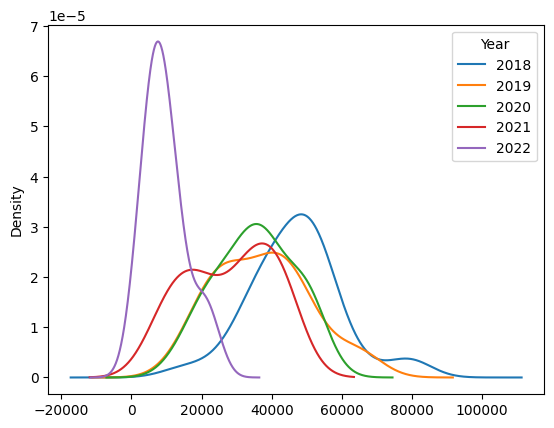

In [11]:
# plotting kde graph for miles
cars_pt['Miles'].plot(kind='kde')

<Axes: ylabel='Density'>

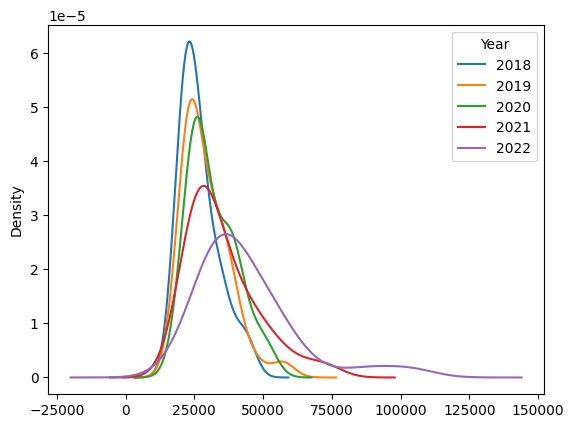

In [12]:
# plotting kde graph for price
cars_pt['Price'].plot(kind='kde')

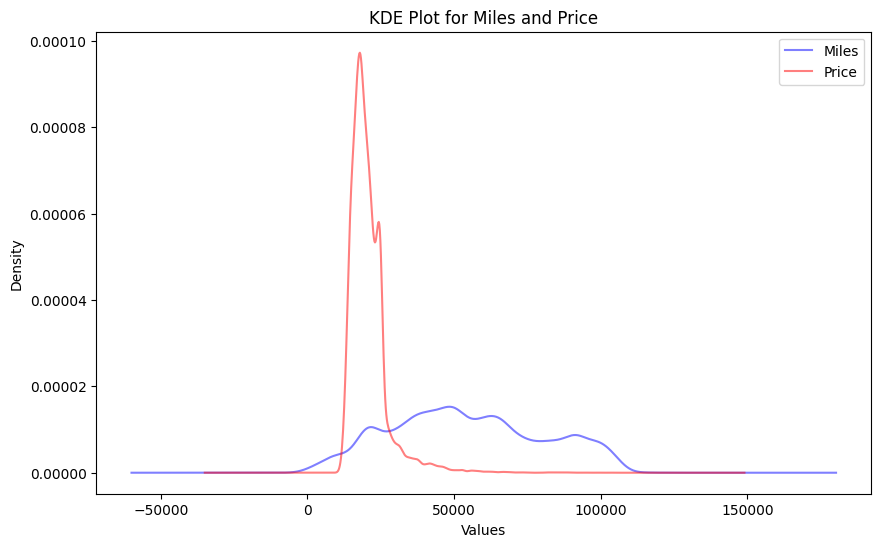

In [13]:
# a cleaned and joint kde plot for 'Miles' and 'Price'

df_cleaned_miles = cars_df['Miles'].dropna()  # Remove NaN values from 'Miles' column
df_cleaned_price = cars_df['Price'].dropna()  # Remove NaN values from 'Price' column

# Plot the KDE using pandas' built-in plot method (it uses seaborn under the hood)
plt.figure(figsize=(10, 6))
df_cleaned_miles.plot(kind='kde', label='Miles', color='blue', alpha=0.5)
df_cleaned_price.plot(kind='kde', label='Price', color='red', alpha=0.5)

plt.title('KDE Plot for Miles and Price')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

plt.show()

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every column represents the **top 10 most frequently occured power stations** resulted in the previous sub-ques, and every row represents a month in a order. Like January, February, March...
- It is hard to get insights if you look through the only pivot table. So plot the pivot table.

In [14]:
PowerGeneration_df = pd.read_csv("datasets/PowerGeneration - PowerGeneration.csv")
PowerGeneration_df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [15]:
# 1. Ideal Production for the day in new column
PowerGeneration_df['Ideal Production'] = np.where(
    PowerGeneration_df['Excess(+) / Shortfall (-)'] < 0,
    PowerGeneration_df['Actual(MU)'] - PowerGeneration_df['Excess(+) / Shortfall (-)'],     # deficit
    (PowerGeneration_df['Excess(+) / Shortfall (-)'] - PowerGeneration_df['Actual(MU)']) * -1  # excess
)
PowerGeneration_df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Ideal Production
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69


In [16]:
# 1. Ideal Production for the day in new column (one line simple method)
PowerGeneration_df['Ideal Production'] = PowerGeneration_df['Actual(MU)'] - PowerGeneration_df['Excess(+) / Shortfall (-)']
PowerGeneration_df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Ideal Production
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69


In [17]:
# 2. Month of the date
PowerGeneration_df['Dates'] = pd.to_datetime(PowerGeneration_df['Dates'])

In [18]:
PowerGeneration_df = PowerGeneration_df.sort_values(by='Dates')
PowerGeneration_df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Ideal Production
0,2017-09-01,Delhi,2235.4,135.0,0.0,135.0,0,13,18,5.00,0.0,13.00
112,2017-09-01,HNPC,1040.0,1040.0,0.0,1040.0,0,12,0,-12.06,0.0,12.06
113,2017-09-01,IBPIL,300.0,300.0,0.0,300.0,0,0,0,0.00,0.0,0.00
114,2017-09-01,ITPCL,1200.0,1200.0,600.0,600.0,0,10,0,-10.37,0.0,10.37
115,2017-09-01,JSWEL,860.0,430.0,0.0,430.0,0,11,6,-4.75,0.0,10.75


In [19]:
PowerGeneration_df['Month'] = PowerGeneration_df['Dates'].dt.month_name()

In [20]:
PowerGeneration_df.head(2)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Ideal Production,Month
0,2017-09-01,Delhi,2235.4,135.0,0.0,135.0,0,13,18,5.00,0.0,13.00,September
112,2017-09-01,HNPC,1040.0,1040.0,0.0,1040.0,0,12,0,-12.06,0.0,12.06,September


In [21]:
# 3. Top 10 most frequently occured Power Stations
PowerGeneration_df['Power Station'].value_counts().head(10).to_frame(name="Occurence Frequency")

,Occurence Frequency
Power Station,
NTPC Ltd.,9570
NPCIL,5742
NHPC,5742
GMR ENERG,5742
JSWEL,3828
NLC,3828
IBPIL,3828
APL,3828
JPPVL,3828


In [22]:
# or if only the names are required, typically in a list
top10_powStatn = PowerGeneration_df['Power Station'].value_counts().head(10).index.to_list()
top10_powStatn

['NTPC Ltd.',
 'NPCIL',
 'NHPC',
 'GMR ENERG',
 'JSWEL',
 'NLC',
 'IBPIL',
 'APL',
 'JPPVL',
 'TATA PCL']

In [23]:
# 4. Pivot table with 'Power Station' as index and Months as col
PS_pt = PowerGeneration_df[PowerGeneration_df['Power Station'].isin(top10_powStatn)].pivot_table(index='Month', columns='Power Station', values='Ideal Production', aggfunc='sum', margins=True)
PS_pt
# added margin for additional info of sum total of each PS in each month, as well as sum total of each PS during the year

Power Station,APL,GMR ENERG,IBPIL,JPPVL,JSWEL,NHPC,NLC,NPCIL,NTPC Ltd.,TATA PCL,All
Month,,,,,,,,,,,
April,19533.71,3717.59,0.0,3980.52,2944.53,8383.42,6793.71,12896.85,88307.99,2396.70,148955.02
August,22577.58,4608.33,0.0,4914.53,3938.23,16586.55,8366.19,17945.07,111603.60,2814.73,193354.81
December,27019.82,5111.68,0.0,5028.26,4741.91,4601.54,9348.39,20564.05,123936.52,2937.99,203290.16
February,23695.95,4024.02,0.0,3972.52,4365.17,4465.50,8593.60,15943.00,103746.01,2590.94,171396.71
January,25105.57,4424.09,0.0,4266.63,4704.94,3678.36,9195.73,17711.41,111747.49,2596.91,183431.13
July,23540.14,4134.48,0.0,3687.77,3666.14,16843.71,8092.45,17288.12,110625.67,2983.62,190862.10
June,23657.85,4236.74,0.0,5598.50,3769.82,15368.68,7434.07,17410.60,111109.54,3037.92,191623.72
March,35757.22,5926.42,0.0,5791.59,6069.21,10352.03,12625.23,26475.12,158101.77,4334.42,265433.01
May,20492.34,3739.89,0.0,4340.72,3129.34,11092.55,6735.69,13446.66,93214.38,2442.60,158634.17


<Axes: xlabel='Month'>

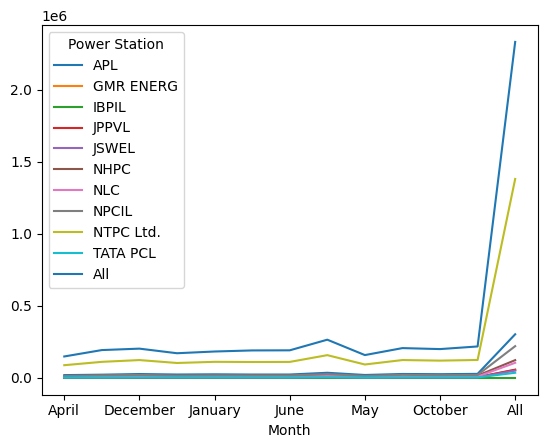

In [24]:
PS_pt.plot(kind='line')

### `Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [25]:
qanda_df = pd.read_csv("datasets/question-answer.csv")
qanda_df = qanda_df.drop(columns='Unnamed: 0')
qanda_df.head()

,2
0,Q1-What is Data Science?
1,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?
3,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?


In [26]:
ques = qanda_df['2'][qanda_df['2'].str.startswith('Q')].str.split('-').str.get(1).reset_index()
ques

,index,2
0,0,What is Data Science?
1,2,2. How is logistic regression done?
2,4,How do you build a random forest model?
3,6,How can you avoid overfitting your model?
4,8,You are given a data set consisting of variabl...
5,10,What is bag of words? How we can use it for te...
6,12,How can we use machine learning for text class...
7,14,What is a time series?
8,16,How is time series different from the usual re...
9,18,What are the different types of joins? What ar...


In [27]:
ans = qanda_df['2'][qanda_df['2'].str.startswith('Ans')].str.split('-').str.get(1).reset_index()
ans

,index,2
0,1,"Data Science combines statistics, maths, speci..."
1,3,Logistic regression measures the relationship ...
2,5,A random forest is built up of a number of dec...
3,7,Overfitting refers to a model that is only set...
4,9,The following are ways to handle missing data ...
5,11,Bag of Words is a representation of text that ...
6,13,Machine learning classification algorithms pre...
7,15,A time series is a set of observations ordered...
8,17,The principle behind causal forecasting is tha...
9,19,(INNER) JOIN: Returns records that have matchi...


In [28]:
refinedQa_df = ques.merge(ans, left_index=True, right_index=True).drop(columns=['index_x', 'index_y']).rename(columns={'2_x': 'Questions', '2_y': 'Answers'})
refinedQa_df

,Questions,Answers
0,What is Data Science?,"Data Science combines statistics, maths, speci..."
1,2. How is logistic regression done?,Logistic regression measures the relationship ...
2,How do you build a random forest model?,A random forest is built up of a number of dec...
3,How can you avoid overfitting your model?,Overfitting refers to a model that is only set...
4,You are given a data set consisting of variabl...,The following are ways to handle missing data ...
5,What is bag of words? How we can use it for te...,Bag of Words is a representation of text that ...
6,How can we use machine learning for text class...,Machine learning classification algorithms pre...
7,What is a time series?,A time series is a set of observations ordered...
8,How is time series different from the usual re...,The principle behind causal forecasting is tha...
9,What are the different types of joins? What ar...,(INNER) JOIN: Returns records that have matchi...


### `Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [29]:
refinedQa_df[~(refinedQa_df['Questions'].str.contains('\?'))]
# there is no question that doesn't have a '?'

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_4258/1125526031.py:1: SyntaxWarning: invalid escape sequence '\?'
  refinedQa_df[~(refinedQa_df['Questions'].str.contains('\?'))]


,Questions,Answers


### **Questions 6–10: Employee Activity Log Analysis**

You are provided with two datasets:

* **Log File**: Contains records of employee activities along with dates and activity details.
* **Employee File**: Contains employee-related information.

The datasets can be loaded using the following code:

```python
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")

employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")
```

> **Note (Common Key):**
>
> * The `employee` dataset contains the column **`EMPLOYEE_ID`**.
> * The `log_file` dataset contains the column **`emp_id`**.
>   These columns should be used to link the two datasets where required.

---

#### **Tasks**

6. Display **month-wise activity details**, showing the **count of each activity** performed in every month.

7. Identify the **employee who performed the highest number of activities in the month of January**.

8. Determine the **employee who has worked the most number of times on weekends**.

9. Identify **which activity is logged most frequently on business (weekday) days**.

10. Create a **weekday-wise activity summary table**, showing how activities are distributed across different days of the week.

In [30]:
log_file = pd.read_csv("datasets/equip_log - equip_log.csv")

employee = pd.read_csv("datasets/employee - employee.csv")

In [31]:
log_file.head()

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery


In [32]:
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [33]:
# 6. Month-wise activity details, frequency of activity each month
log_file['dt'] = pd.to_datetime(log_file['dt'])
log_file['month'] = log_file['dt'].dt.month_name()
log_file.head()

,Log_ID,dt,dept,emp_id,activity,eqpt,month
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January
4,1004,2022-01-11,Dept3,138,Checking,Battery,January


In [34]:
log_file.pivot_table(
    index='month',
    columns='activity',
    aggfunc='size',
    fill_value=0
)

activity,Checking,Cleaning,Inspection,Repair
month,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


In [35]:
log_file.groupby(['month', 'activity']).size().unstack(fill_value=0)

activity,Checking,Cleaning,Inspection,Repair
month,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


In [36]:
# 7. employee who performed the highest number of activities in the month of january
log_fileJan = log_file.pivot_table(index=['emp_id', 'month'], columns='activity', aggfunc='size', fill_value=0).swaplevel().loc['January']
log_fileJan

activity,Checking,Cleaning,Inspection,Repair
emp_id,,,,
102,1,0,1,0
105,0,1,0,0
107,0,1,0,0
108,1,0,0,0
109,0,1,0,0
110,1,0,0,0
112,0,1,1,0
115,0,1,0,0
116,1,0,0,1


In [37]:
log_fileJan['Total Activities'] = log_fileJan['Checking'] + log_fileJan['Cleaning'] + log_fileJan['Inspection'] + log_fileJan['Repair']
log_fileJan

activity,Checking,Cleaning,Inspection,Repair,Total Activities
emp_id,,,,,
102,1,0,1,0,2
105,0,1,0,0,1
107,0,1,0,0,1
108,1,0,0,0,1
109,0,1,0,0,1
110,1,0,0,0,1
112,0,1,1,0,2
115,0,1,0,0,1
116,1,0,0,1,2


In [38]:
# employee with the highest number of activities performed in the month of january
log_fileJan.sort_values(by='Total Activities', ascending=False).head(1).merge(employee, left_on='emp_id', right_on='EMPLOYEE_ID')[['FIRST_NAME', 'LAST_NAME', 'Total Activities']]

,FIRST_NAME,LAST_NAME,Total Activities
0,Payam,Kaufling,3


In [39]:
# or we could also do this by this simple method
log_file.query("month == 'January'")['emp_id'].value_counts().head(1)

emp_id
122    3
Name: count, dtype: int64

In [40]:
# 8. employee who has worked the most number of times on weekends
log_file['Day'] = log_file['dt'].dt.day_name()
log_file

,Log_ID,dt,dept,emp_id,activity,eqpt,month,Day
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,Saturday
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January,Sunday
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January,Monday
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,Tuesday
...,...,...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC,January,Monday
361,1361,2023-01-03,Dept4,116,Checking,Server,January,Tuesday
362,1362,2023-01-04,Dept4,110,Checking,CPU,January,Wednesday
363,1363,2023-01-05,Dept4,102,Inspection,AC,January,Thursday


In [41]:
# most_occuring = log_file[(log_file['Day'] == 'Saturday') | (log_file['Day'] == 'Sunday')]['emp_id'].mode().iloc[0]

most_occuring = log_file[(log_file['Day'] == 'Saturday') | (log_file['Day'] == 'Sunday')]['emp_id'].value_counts().head(1)
most_occuring

emp_id
144    6
Name: count, dtype: int64

In [42]:
most_occuring.to_frame(name='most_occuring')

,most_occuring
emp_id,
144,6


In [43]:
most_occuring.index

Index([144], dtype='int64', name='emp_id')

In [44]:
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [45]:
employee.merge(most_occuring.to_frame(name='most_occuring'), left_on='EMPLOYEE_ID', right_index=True, how='inner')

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,most_occuring


In [46]:
employee[employee["EMPLOYEE_ID"] == 144]
# seems like out buddy with emp_id=144 doesnt exist in employee df

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL


In [47]:
# 9. activity that is most frequently logged on business days
log_file[(log_file['Day'] != 'Saturday') & (log_file['Day'] != 'Sunday')]['activity'].value_counts().head(1).to_frame(name='freq on workdays')

,freq on workdays
activity,
Inspection,77


In [48]:
# 10. weekday wise distribution of activities
log_file.pivot_table(index='Day', columns='activity',aggfunc='size')

activity,Checking,Cleaning,Inspection,Repair
Day,,,,
Friday,8,16,20,9
Monday,10,14,13,15
Saturday,18,11,8,15
Sunday,13,13,15,11
Thursday,8,16,16,12
Tuesday,15,9,15,13
Wednesday,14,9,13,16


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [49]:
employee[employee['FIRST_NAME'].isna()]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
12,112,NaN,Urman,JMURMAN
21,121,NaN,Fripp,AFRIPP
32,132,NaN,Olson,TJOLSON


In [57]:
# 1. Filling the missing values in FIRST_NAME using EMAIL and LAST_NAME field
fill_values = employee[employee['FIRST_NAME'].isnull()].apply(lambda x: x['EMAIL'][0] + x['LAST_NAME'][0], axis=1)
fill_values

12    JU
21    AF
32    TO
dtype: object

In [58]:
employee['FIRST_NAME'].fillna(fill_values, inplace=True)

In [ ]:
employee[employee['FIRST_NAME'].isnull()]
# all the FIRST_NAME with null values filled

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL


In [64]:
# adding domain name at the end of each email
employee['EMAIL'] = employee['EMAIL'] + '@campusx.com'
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING@campusx.com
1,101,Neena,Kochhar,NKOCHHAR@campusx.com
2,102,Lex,De Haan,LDEHAAN@campusx.com
3,103,Alexander,Hunold,AHUNOLD@campusx.com
4,104,Bruce,Ernst,BERNST@campusx.com


In [ ]:
# 3. Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]
temp_df = log_file[log_file['activity'].isin(['Incpection', 'Cleaning', 'Checking'])]
temp_df

,Log_ID,dt,dept,emp_id,activity,eqpt,month,Day
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,Saturday
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,Tuesday
8,1008,2022-01-15,Dept1,143,Checking,UPS,January,Saturday
10,1010,2022-01-17,Dept4,142,Cleaning,Server,January,Monday
...,...,...,...,...,...,...,...,...
358,1358,2022-12-31,Dept2,140,Checking,Fan,December,Saturday
359,1359,2023-01-01,Dept3,122,Cleaning,Pump,January,Sunday
361,1361,2023-01-03,Dept4,116,Checking,Server,January,Tuesday
362,1362,2023-01-04,Dept4,110,Checking,CPU,January,Wednesday


In [68]:
temp2_df = temp_df.merge(employee, left_on='emp_id', right_on='EMPLOYEE_ID')
temp2_df

,Log_ID,dt,dept,emp_id,activity,eqpt,month,Day,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday,115,Alexander,Khoo,AKHOO@campusx.com
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,Saturday,105,David,Austin,DAUSTIN@campusx.com
2,1004,2022-01-11,Dept3,138,Checking,Battery,January,Tuesday,138,Stephen,Stiles,SSTILES@campusx.com
3,1012,2022-01-19,Dept2,119,Cleaning,Server,January,Wednesday,119,Karen,Colmenares,KCOLMENA@campusx.com
4,1014,2022-01-21,Dept4,127,Checking,Battery,January,Friday,127,James,Landry,JLANDRY@campusx.com
...,...,...,...,...,...,...,...,...,...,...,...,...
136,1358,2022-12-31,Dept2,140,Checking,Fan,December,Saturday,140,Joshua,Patel,JPATEL@campusx.com
137,1359,2023-01-01,Dept3,122,Cleaning,Pump,January,Sunday,122,Payam,Kaufling,PKAUFLING@campusx.com
138,1361,2023-01-03,Dept4,116,Checking,Server,January,Tuesday,116,Shelli,Baida,SBAIDA@campusx.com
139,1362,2023-01-04,Dept4,110,Checking,CPU,January,Wednesday,110,John,Chen,JCHEN@campusx.com


In [71]:
temp3_df = temp2_df[temp2_df['FIRST_NAME'].str.startswith('A')]
temp3_df

,Log_ID,dt,dept,emp_id,activity,eqpt,month,Day,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday,115,Alexander,Khoo,AKHOO@campusx.com
16,1038,2022-02-14,Dept2,115,Cleaning,Fan,February,Monday,115,Alexander,Khoo,AKHOO@campusx.com
36,1093,2022-04-10,Dept2,103,Checking,AC,April,Sunday,103,Alexander,Hunold,AHUNOLD@campusx.com
81,1224,2022-08-19,Dept1,103,Cleaning,AC,August,Friday,103,Alexander,Hunold,AHUNOLD@campusx.com
111,1293,2022-10-27,Dept4,115,Checking,CPU,October,Thursday,115,Alexander,Khoo,AKHOO@campusx.com
112,1294,2022-10-28,Dept6,103,Checking,Battery,October,Friday,103,Alexander,Hunold,AHUNOLD@campusx.com
124,1322,2022-11-25,Dept2,115,Cleaning,Fan,November,Friday,115,Alexander,Khoo,AKHOO@campusx.com
129,1332,2022-12-05,Dept3,115,Checking,UPS,December,Monday,115,Alexander,Khoo,AKHOO@campusx.com


In [ ]:
(temp3_df['FIRST_NAME'] + ' ' + temp3_df['LAST_NAME']).unique()

array(['Alexander Khoo', 'Alexander Hunold'], dtype=object)